# Deviance analysis of age-period-cohort models

We replicate [Nielsen (2014)](http://www.nuffield.ox.ac.uk/economics/papers/2014/apc_deviance.pdf). The paper considers deviance analysis to test for model reduction in age-period-cohort models. It further elaborates on the interpretation of the canonical identification of age-period-cohort effects by [Kuang et al. (2008)](https://doi.org/10.1093/biomet/asn026) and expands this parametrization to more general data structures. 

First, we load the package.

In [1]:
import apc

In [2]:
# Turn off FutureWarnings
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 2.2 Data Structure

Next, we look at the data. These concern lung cancer mortality in Belgium and are taken from Clayton and Schifflers (1987). Data are available for the response, that is the death counts and for mortality rates. The rates are computed as the ratio of the number of deaths to the exposure measured in 100,000 person-years.

While the data come pre-formatted with the package and can be called with ``apc.Belgian_lung_cancer()``, we could also read them from an excel or csv file, for example by loading pandas with `` import pandas as pd `` and calling `` pd.read_excel('path/to/file.xlsx') `` or `` pd.read_csv('path/to/file.csv') ``.

Table 1 consists of the responses:

In [3]:
apc.Belgian_lung_cancer()['response']

,1955-1959,1960-1964,1965-1969,1970-1974
,,,,
25-29,3,2,7,3
30-34,11,16,11,10
35-39,11,22,24,25
40-44,36,44,42,53
45-49,77,74,68,99
50-54,106,131,99,142
55-59,157,184,189,180
60-64,193,232,262,249
65-69,219,267,323,325


paired with the rates:

In [4]:
apc.Belgian_lung_cancer()['rate']

,1955-1959,1960-1964,1965-1969,1970-1974
,,,,
25-29,0.19,0.13,0.50,0.19
30-34,0.66,0.98,0.72,0.71
35-39,0.78,1.32,1.47,1.64
40-44,2.67,3.16,2.53,3.38
45-49,4.84,5.60,4.93,6.05
50-54,6.60,8.50,7.65,10.59
55-59,10.36,12.00,12.68,14.34
60-64,14.76,16.37,18.00,17.60
65-69,20.53,22.60,24.90,24.33


These data are organized in an age-period array with age running down the rows and period increasing over columns.

In Table 2, we see the rates mapped into an age-cohort array.

To replicate, we first organize the data, which come with the package, in a slightly more useful form

In [5]:
model = apc.Model()
model.data_from_df(**apc.Belgian_lung_cancer())

This organizes the data in vector form with a MultiIndex. The third, formerly missing cohort time-scale is generated internally. We look at the first couple rows of this vector:

In [6]:
model.data_vector.head()

response       dose  rate
Period    Age   Cohort                              
1955-1959 25-29 1926-1934         3  15.789474  0.19
          30-34 1921-1929        11  16.666667  0.66
          35-39 1916-1924        11  14.102564  0.78
          40-44 1911-1919        36  13.483146  2.67
          45-49 1906-1914        77  15.909091  4.84

We can see that the cohort range is wider than the period and age range. To see why, consider when individuals between age 25-29 who died within period 1955-1959 must have been born. Looking at the earliest and latest possible birthyear, a 29 year old who died in 1955 was born in 1926. Similarly, a 25 year old who died in 1959 was born in 1934. Thus, the cohort range is given as 1926-1934.

Now, we can arrange the mortality rates in age-cohort space as in Table 2, using a function that is originally intended for internal use by the package:

In [7]:
model._vector_to_array(model.data_vector['rate'], space='AC').fillna('')

Cohort,1876-1884,1881-1889,1886-1894,1891-1899,1896-1904,1901-1909,1906-1914,1911-1919,1916-1924,1921-1929,1926-1934,1931-1939,1936-1944,1941-1949
Age,,,,,,,,,,,,,,
25-29,,,,,,,,,,,0.19,0.13,0.5,0.19
30-34,,,,,,,,,,0.66,0.98,0.72,0.71,
35-39,,,,,,,,,0.78,1.32,1.47,1.64,,
40-44,,,,,,,,2.67,3.16,2.53,3.38,,,
45-49,,,,,,,4.84,5.6,4.93,6.05,,,,
50-54,,,,,,6.6,8.5,7.65,10.59,,,,,
55-59,,,,,10.36,12,12.68,14.34,,,,,,
60-64,,,,14.76,16.37,18,17.6,,,,,,,
65-69,,,20.53,22.6,24.9,24.33,,,,,,,,


## 3.6 Model and Identification & 4.3 Ad Hoc Identified Plot of Time Effects

The age-period-cohort predictor is given by

$$ \mu_{ik} = \underbrace{\alpha_i}_{\text{Age Effect}} + \underbrace{\beta_j}_{\text{Period Effect}} + \underbrace{\gamma_k}_{\text{Cohort Effect}} + \underbrace{\delta}_{\text{Level}} $$

The individual effects are well known not to be identified. The solution used in the paper to the problem is to first find a parameterization with identified parameters while avoiding the imposition of ad hoc constraints. It is shown that we can rewrite 

$$ \mu_{ik} = \underbrace{\nu_0}_{\text{Level}}  + \underbrace{(i-U) \nu_a}_{\text{Linear Trend 1}} + \underbrace{(k - U) \nu_c}_{\text{Linear Trend 2}} + \underbrace{\sum \sum \Delta^2 \alpha_i}_{\text{Detrended Age Effect}} + \underbrace{\sum \sum \Delta^2 \beta_j}_{\text{Detrended Period Effect}} + \underbrace{\sum \sum \Delta^2 \gamma_k}_{\text{Detrended Cohort Effect}} $$

The parameters $\nu_0$, $\nu_a$, $\nu_c$, $\Delta^2 \alpha_i$, $\Delta^2 \beta_j$, $\Delta^2 \gamma_k$ are identified. These are the parameters the model estimates.

[Below](#5.6-Inference), we show a number of possible sub-models arising from the age-period-cohort predictor.

We fit and poisson-dose-response age-period-cohort model to the data.

In [8]:
model.fit('poisson_dose_response', 'APC')

We can then extract the deviance by calling

In [9]:
model.deviance

20.224957701053945

To find the p-value, we make use of another function that we will revisit again [below](#5.6-Inference).

In [10]:
model.fit_table('poisson_dose_response', attach_to_self=False).loc[['APC']]

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,P>chi_sq
APC,20.225,18,0.320298,NaN,NaN,NaN


The paper next considers a probability transform map. We instead plot the deviance residuals.

*Remark: ``simplify_ranges`` is useful for larger data sets where the axes labels become cluttered if all indices are plotted. Here, there is no need for this*

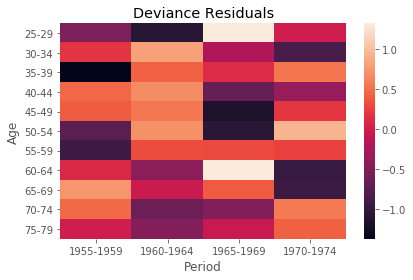

In [11]:
model.plot_residuals(simplify_ranges=False)

Before we replicate the parameter plot in Figure 3, we look at the estimated parameters.

In [12]:
model.parameters

,coef,std_err,z,P>|z|
level,1.957546,0.065878,29.714553,4.980900e-194
slope_age,0.504384,0.075220,6.705446,2.007924e-11
slope_coh,0.120879,0.067994,1.777784,7.543934e-02
dd_age_35-39,-0.497117,0.427483,-1.162891,2.448736e-01
dd_age_40-44,0.253907,0.288400,0.880401,3.786423e-01
dd_age_45-49,-0.155115,0.205152,-0.756098,4.495907e-01
dd_age_50-54,-0.205505,0.150426,-1.366154,1.718908e-01
dd_age_55-59,-0.043344,0.118725,-0.365080,7.150515e-01
dd_age_60-64,-0.092603,0.097120,-0.953497,3.403386e-01
dd_age_65-69,0.023606,0.083549,0.282538,7.775312e-01


Onwards to plotting them. The paper discusses the interpretation for the linear trends and detrended parameters; see also Nielsen (2015).

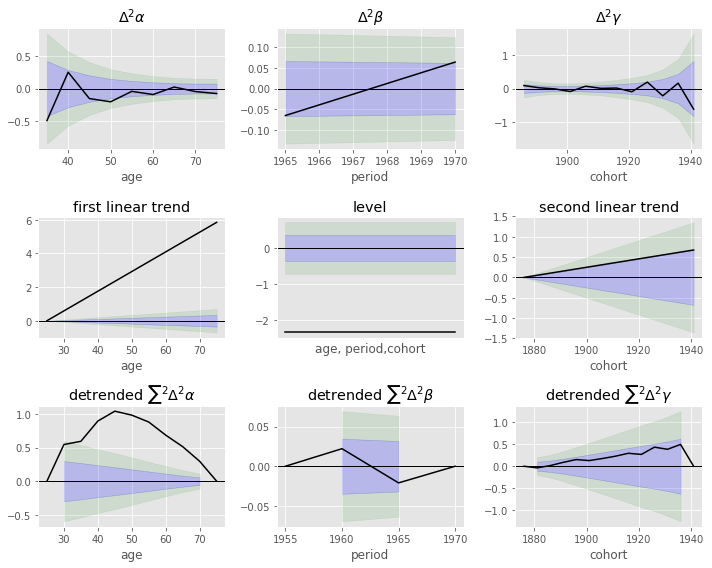

In [13]:
model.plot_parameters(around_coef=False)

In Figure 4, the parameter plot is redone, except the model is now estimated after dropping the youngest two age groups.

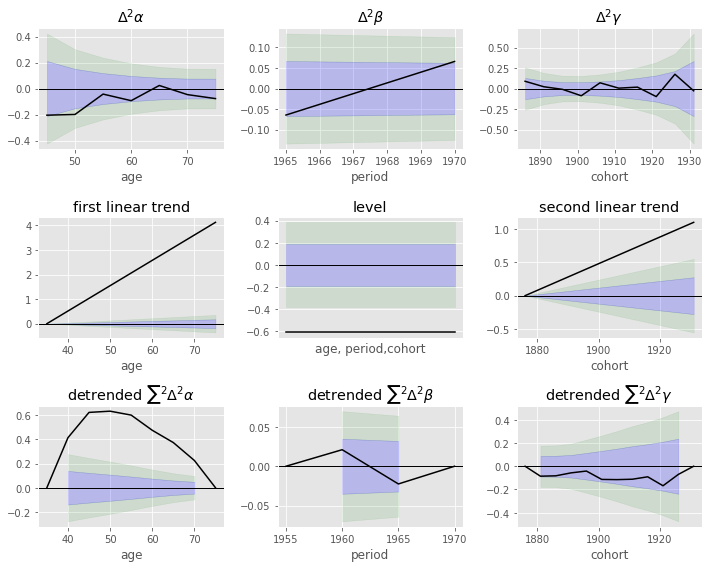

In [14]:
sub_model = model.sub_model(age_from_to=('35-39', None))

sub_model.plot_parameters(around_coef=False)

## 5.6 Inference

We move on to test for model reduction. The paper elaborates on a number of different sub-models. These arise by restriction the identified parameters mentioned above, illustrated in Table 3 in the paper:

<img src="https://user-images.githubusercontent.com/25103918/43285139-091fff84-90ec-11e8-9797-36fa15353f22.png" alt="Sub-Models Parameterizations" width="400"/>

This also gives rise to a nested structure as shown in Figure 5 in the paper:

<img src="https://user-images.githubusercontent.com/25103918/42902938-3fc5c6bc-8a9e-11e8-94b6-7406f9a42c29.png" alt="Nested Sub-Models" width="400"/>


We can now produce a deviance table as shown in Table 4 in the paper:

In [15]:
model.fit_table()
model.deviance_table

,deviance,df_resid,P>chi_sq,LR_vs_APC,df_vs_APC,P>chi_sq
APC,20.225,18,0.320298,NaN,NaN,NaN
AP,25.5579,30,0.697492,5.33293,12,0.945925
AC,21.4537,20,0.370873,1.22876,2,0.540975
PC,99.2285,27,3.44469e-10,79.0035,9,2.54907e-13
Ad,26.5839,32,0.737221,6.35894,14,0.956618
Pd,253.562,39,0,233.337,21,0
Cd,100.712,29,7.52274e-10,80.4873,11,1.18783e-12
A,85.5773,33,1.49555e-06,65.3523,15,2.96382e-08
P,6390.15,40,0,6369.92,22,0
C,1217.03,30,0,1196.81,12,0


We can see that a number of reductions are not rejected. This includes the an age-period model that cannot be rejected against the age-period-cohort model with a p-value of 0.95 (last column), an age-cohort model with a p-value of 0.54, and an age-drift model with a p-value of 0.96. The age-drift model allows for age effects but restrict cohort and period effects to linear trends (the trend in age and cohort direction also allows for a trend in the period direction).

The paper goes on to consider further restrictions on the age effect in the age-drift model.

Before looking at this, we fit and age-drift model and plot the parameters.

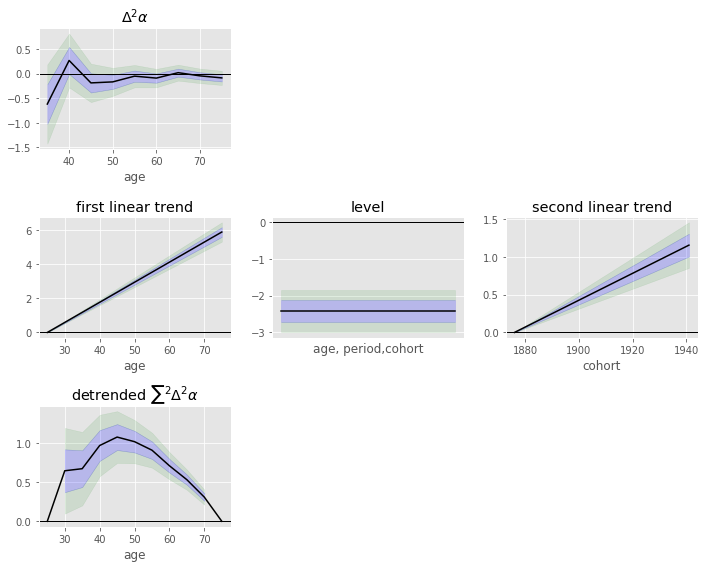

In [16]:
model_Ad = model.clone()
model_Ad.fit('poisson_dose_response', 'Ad')

model_Ad.plot_parameters()

The idea is now to investigate whether the age effect could reasonably be restricted to be cubic or quadratic.

Reductions of this type are not by default implemented in the package. However, we can pass a restriction matrix ``R`` to ``Model.fit``. This matrixes right-multiplies the design generated by the predictor choice to allow for individualized restrictions. However, further analysis then needs to be done by hand.

As explained in the paper, a cubic age effect corresponds to a linear trend in the double differences so

$$ H_{Adc}: \Delta^2 \alpha_i = a + b (i-2) $$

A quadratic age effect further restricts the double differences to be constant so

$$ H_{Adq}: \Delta^2 \alpha_i = a .$$


Having fitted the model, we can access the design matrix of the age-drift model as follows:

In [17]:
model_Ad.design.head()

level  slope_age  slope_coh  dd_age_35-39  \
Period    Age   Cohort                                                 
1955-1959 25-29 1926-1934      1         -5          5             1   
          30-34 1921-1929      1         -4          4             0   
          35-39 1916-1924      1         -3          3             0   
          40-44 1911-1919      1         -2          2             0   
          45-49 1906-1914      1         -1          1             0   

                           dd_age_40-44  dd_age_45-49  dd_age_50-54  \
Period    Age   Cohort                                                
1955-1959 25-29 1926-1934             2             3             4   
          30-34 1921-1929             1             2             3   
          35-39 1916-1924             0             1             2   
          40-44 1911-1919             0             0             1   
          45-49 1906-1914             0             0             0   

                           dd_age_55-59  dd_age_60-64  dd_age_65-69  \
Period    Age   Cohort                                                
1955-1959 25-29 1926-1934             5             0             0   
          30-34 1921-1929             4             0             0   
          35-39 1916-1924             3             0             0   
          40-44 1911-1919             2             0             0   
          45-49 1906-1914             1             0             0   

                           dd_age_70-74  dd_age_75-79  
Period    Age   Cohort                                 
1955-1959 25-29 1926-1934             0             0  
          30-34 1921-1929             0             0  
          35-39 1916-1924             0             0  
          40-44 1911-1919             0             0  
          45-49 1906-1914             0             0

We construct the ``R`` matrix for the cubic restriction.

In [18]:
import numpy as np 
import pandas as pd
row_idx = model_Ad.design.columns
col_idx = ['level', 'slope_age', 'slope_coh', 'a', 'b']
R_Adc = pd.DataFrame(0., row_idx, col_idx)
R_Adc.loc[['level', 'slope_age', 'slope_coh'], ['level', 'slope_age', 'slope_coh']] = np.identity(3)
R_Adc.loc['dd_age_35-39':, 'a'] = 1.
R_Adc.loc['dd_age_35-39':, 'b'] = range(model.I-2)

Lets take a look at the restriction matrix:

In [19]:
R_Adc

,level,slope_age,slope_coh,a,b
level,1.0,0.0,0.0,0.0,0.0
slope_age,0.0,1.0,0.0,0.0,0.0
slope_coh,0.0,0.0,1.0,0.0,0.0
dd_age_35-39,0.0,0.0,0.0,1.0,0.0
dd_age_40-44,0.0,0.0,0.0,1.0,1.0
dd_age_45-49,0.0,0.0,0.0,1.0,2.0
dd_age_50-54,0.0,0.0,0.0,1.0,3.0
dd_age_55-59,0.0,0.0,0.0,1.0,4.0
dd_age_60-64,0.0,0.0,0.0,1.0,5.0
dd_age_65-69,0.0,0.0,0.0,1.0,6.0


Going on to fit the model:

In [20]:
model_Adc = model_Ad.clone()
model_Adc.fit('poisson_dose_response', 'Ad', R=R_Adc)

We can now access the deviance as

In [21]:
model_Adc.deviance

31.568745495181624

and the degrees of freedom with

In [22]:
model_Adc.df_resid

39

To compute the p-value, we have to get some help, working outside of the model framework:

In [23]:
from scipy import stats

print('p-value of deviance: {:.2f}'.format(
    stats.chi2.sf(model_Adc.deviance, model_Adc.df_resid)))

p-value of deviance: 0.80


The likelihood ratio to the age-drift model is given by

In [24]:
model_Adc.deviance - model_Ad.deviance

4.984842888829309

This yields a p-value of

In [25]:
stats.chi2.sf(model_Adc.deviance - model_Ad.deviance, 
              model_Adc.df_resid - model_Ad.df_resid)

0.6618130195072733

Next, we look at the quadratic restriction, following the same process.

In [26]:
R_Adq = R_Adc.drop('b', axis=1)

R_Adq

,level,slope_age,slope_coh,a
level,1.0,0.0,0.0,0.0
slope_age,0.0,1.0,0.0,0.0
slope_coh,0.0,0.0,1.0,0.0
dd_age_35-39,0.0,0.0,0.0,1.0
dd_age_40-44,0.0,0.0,0.0,1.0
dd_age_45-49,0.0,0.0,0.0,1.0
dd_age_50-54,0.0,0.0,0.0,1.0
dd_age_55-59,0.0,0.0,0.0,1.0
dd_age_60-64,0.0,0.0,0.0,1.0
dd_age_65-69,0.0,0.0,0.0,1.0


In [27]:
model_Adq = model_Ad.clone()
model_Adq.fit('poisson_dose_response', 'Ad', R=R_Adq)

In [28]:
model_Adq.deviance

39.44745618141044

In [29]:
model_Adq.df_resid

40

In [30]:
print('p-value of deviance: {:.2f}'.format(
    stats.chi2.sf(model_Adq.deviance, model_Adq.df_resid)))

p-value of deviance: 0.49


The likelihood ratio to the age-drift model is given by

In [31]:
model_Adq.deviance - model_Ad.deviance

12.863553575058123

This yields a p-value of

In [32]:
stats.chi2.sf(model_Adq.deviance - model_Ad.deviance, 
              model_Adq.df_resid - model_Ad.df_resid)

0.11663133042418931

Thus, neither the cubic nor the quadratic model can be rejected against the age-drift model. With this, we have reconstructed Table 5.

We move on to evaluate whether the quadratic model is a valid reduction not from the age-drift, but from the cubic model whose immediate child the quadratic model is.

We can do this, again, with a likelihood ratio test as in the paper. The likelihood ratio is 

In [33]:
model_Adq.deviance - model_Adc.deviance

7.878710686228814

which, with one degree of freedom yields a p-value of

In [34]:
stats.chi2.sf(model_Adq.deviance - model_Adc.deviance, 
              model_Adq.df_resid - model_Adc.df_resid)

0.0050020128857816495

Thus, the reduction is rejected.

Rather than employing a likelihood ratio test, we could also look at the parameter table to gauge whether the slope $b$ is significant in the Adc model:

In [35]:
model_Adc.parameters

,coef,std_err,z,P>|z|
level,1.973417,0.030819,64.033340,0.000000e+00
slope_age,0.487573,0.016957,28.753802,8.118543e-182
slope_coh,0.088776,0.011575,7.669945,1.720702e-14
a,-0.133369,0.026326,-5.066162,4.059160e-07
b,0.014200,0.005128,2.769198,5.619451e-03


This is confirmed with a p-value of 0.006 so that this approach gives us the same indication.

# References

* Clayton, D. and Schifflers, E. (1987). Models for temporal variation in cancer rates. I: age-period and age-cohort models. *Statistics in Medicine* 6, 449-467.
* Kuang, D., Nielsen, B., & Nielsen, J. P. (2008). Identification of the age-period-cohort model and the extended chain-ladder model. *Biometrika*, 95(4), 979–986. [Open Access](https://doi.org/10.1093/biomet/asn026)
* Nielsen, B. (2014). Deviance analysis of age-period-cohort models. *Nuffield Discussion Paper*, (W03). [Download](http://www.nuffield.ox.ac.uk/economics/papers/2014/apc_deviance.pdf)
* Nielsen, B. (2015). apc: An R Package for Age-Period-Cohort Analysis. *The R Journal*, 7(2), 52–64. [Open Access](https://journal.r-project.org/archive/2015-2/nielsen.pdf)